Files already downloaded and verified
Files already downloaded and verified


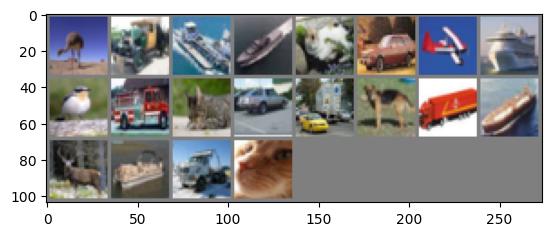

Epoch [1/20], Step [2000/2500], Loss: 2.3162
Epoch [2/20], Step [2000/2500], Loss: 2.2451
Epoch [3/20], Step [2000/2500], Loss: 2.0292
Epoch [4/20], Step [2000/2500], Loss: 1.9183
Epoch [5/20], Step [2000/2500], Loss: 1.9330
Epoch [6/20], Step [2000/2500], Loss: 1.6944
Epoch [7/20], Step [2000/2500], Loss: 1.7348
Epoch [8/20], Step [2000/2500], Loss: 1.5591
Epoch [9/20], Step [2000/2500], Loss: 1.7440
Epoch [10/20], Step [2000/2500], Loss: 1.8617
Epoch [11/20], Step [2000/2500], Loss: 1.6151
Epoch [12/20], Step [2000/2500], Loss: 1.2074
Epoch [13/20], Step [2000/2500], Loss: 1.0310
Epoch [14/20], Step [2000/2500], Loss: 1.3380
Epoch [15/20], Step [2000/2500], Loss: 1.0468
Epoch [16/20], Step [2000/2500], Loss: 1.0589
Epoch [17/20], Step [2000/2500], Loss: 1.2253
Epoch [18/20], Step [2000/2500], Loss: 1.2467
Epoch [19/20], Step [2000/2500], Loss: 1.4195
Epoch [20/20], Step [2000/2500], Loss: 1.0092
Finished Training
Accuracy of the network: 57.74 %
working
Accuracy of plane: 58.4 %
Accu

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

EPOCHS = 20
batch_size = 20
lr = 0.002

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
    
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x))) 
        x = x.view(-1, 16 * 5 * 5)            
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))               
        x = self.fc3(x)                       
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

n_total_steps = len(train_loader)
for epoch in range(EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        
        
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples 
    print(f'Accuracy of the network: {acc} %')

    print("working")

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')